# ÌôïÎ•† - ÌëúÎ≥∏ Î∂ÑÌè¨

In [1]:
# Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏ 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning Ï†úÍ±∞

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

# ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ 
import matplotlib.pyplot as plt #  matplotlib ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ 
import seaborn as sns
%matplotlib inline

# osÏóê Îî∞Î•∏ Font Íπ®Ïßê Ï†úÍ±∞Î•º ÏúÑÌï¥ Font ÏßÄÏ†ï 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - Í∞íÏù¥ Íπ®ÏßÄÎäî Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌï¥ ÌååÎùºÎØ∏ÌÑ∞ Í∞í ÏÑ§Ï†ï 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 1. ÌëúÎ≥∏ÌèâÍ∑†Ïùò ÌëúÎ≥∏Î∂ÑÌè¨ 
- ÌëúÎ≥∏Î∂ÑÌè¨ : Î™®ÏßëÎã®ÏóêÏÑú ÏùºÏ†ïÌïú ÌÅ¨Í∏∞Ïùò Î™®Îì† Í∞ÄÎä•Ìïú ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌïòÏòÄÏùÑ Îïå Í∑∏ Î™®Îì† ÌëúÎ≥∏ÏúºÎ°úÎ∂ÄÌÑ∞ Í≥ÑÏÇ∞Îêú ÌÜµÍ≥ÑÎüâÏùò ÌôïÎ•†Î∂ÑÌè¨

In [2]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± 
s_x = np.linspace(-5, 100, 1000)
s_df = pd.DataFrame(s_x)

In [4]:
s_df.head()

0
0 -5.000000
1 -4.894895
2 -4.789790
3 -4.684685
4 -4.579580

In [6]:
# Ï∞®Ïõê Ï†ïÎ¶¨ 
s_df_sqz = s_df.squeeze('columns')

In [8]:
# s_df_sqz

In [20]:
### Í∞Å ÏÉòÌîåÏàòÏóê Îî∞Î•∏ 1000Í∞ú ÌèâÍ∑† Í≥ÑÏÇ∞  
sample_data = pd.DataFrame({
    'dist': s_df_sqz.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'dist': [s_df_sqz.sample(5).mean() for _ in range(1000)],
    'type': '5Í∞úÏÉòÌîåÌèâÍ∑†',
})

sample_mean_10 = pd.DataFrame({
    'dist': [s_df_sqz.sample(10).mean() for _ in range(1000)],
    'type': '10Í∞úÏÉòÌîåÌèâÍ∑†',
})

sample_mean_20 = pd.DataFrame({
    'dist': [s_df_sqz.sample(20).mean() for _ in range(1000)],
    'type': '20Í∞úÏÉòÌîåÌèâÍ∑†',
})

sample_mean_30 = pd.DataFrame({
    'dist': [s_df_sqz.sample(30).mean() for _ in range(1000)],
    'type': '30Í∞úÏÉòÌîåÌèâÍ∑†',
})

results = pd.concat([sample_data, sample_mean_05,sample_mean_10, sample_mean_20, sample_mean_30])

In [21]:
results.shape

(5000, 2)

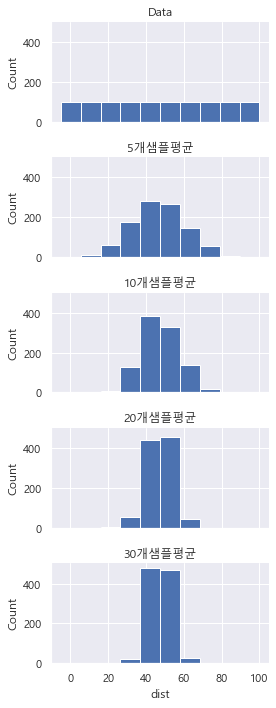

In [22]:
# ÏÉòÌîå ÏàòÏóê Îî∞Î•∏ ÌëúÎ≥∏ÌèâÍ∑†Ïùò ÏãúÍ∞ÅÌôî 
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)

g.map(plt.hist, 'dist', range=[-5, 100], bins=10)
g.set_axis_labels('dist', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()


## 2. Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨ 

### 1)  Ï†ïÍ∑úÎ∂ÑÌè¨ 
- ÌèâÍ∑†ÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ï¢åÏö∞ÎåÄÏπ≠Ïù¥Í≥† Ï¢ÖÎ™®ÏñëÏùÑ Í∞ñÎäî ÌôïÎ•†Î∂ÑÌè¨(=Í∞ÄÏö∞Ïä§ Î∂ÑÌè¨, Gaussian distribution)
####  stats.norm(loc = 'Í∏∞ÎåÄÍ∞í', scale = 'ÌëúÏ§ÄÌé∏Ï∞®)  

In [34]:
## Í∏∞ÎåìÍ∞íÏù¥ 50Ïù¥Í≥† ÌëúÏ§Ä Ìé∏Ï∞®Í∞Ä 10Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨ 
# Íµ¨Í∞Ñ ÎÇ¥Ïóê Ïà´ÏûêÎ•º Í∑†ÏùºÌïú Í∞ÑÍ≤©ÏúºÎ°ú ÏÉùÏÑ±(XÏ∂ï)
norm = stats.norm(loc=50, scale=10)

## -10 ~ 120 ÍπåÏßÄ 2000Í∞ú ÏÉùÏÑ± 
s_x = np.linspace(-10, 120, 2000)
## ÌôïÎ•† Î∞ÄÎèÑÌï®Ïàò 
s_pdf = norm.pdf(s_x)

In [35]:
# Ï†ïÍ∑ú Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî 
plt.plot(s_x, s_pdf)
plt.title("Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 2) Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨
- Ïã§ÏÑ∏Í≥ÑÏóêÏÑú Î∞úÏÉùÌïòÎäî ÌòÑÏÉÅ Ï§ë ÎßéÏùÄ Í≤ÉÎì§Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î°ú Î™®ÌòïÌôî
- Ïó¨Îü¨ ÌôïÎ•†Î≥ÄÏàòÏùò Ìï©Ïù¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎπÑÏä∑Ìïú Î∂ÑÌè¨Î•º Ïù¥Î£®Îäî ÌòÑÏÉÅ
- Î™®ÏßëÎã®Ïóê ÎåÄÌïú sampling ÌöüÏàòÍ∞Ä ÎäòÏñ¥ÎÇ† ÏàòÎ°ù Í∑∏ ÌëúÎ≥∏Îì§Ïùò ÌèâÍ∑†ÏùÄ Î™®ÏßëÎã®Ïùò ÌèâÍ∑†ÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎùÑÍ≤å ÎêòÎäî ÌòÑÏÉÅ 

In [36]:
## ÎèôÏ†ÑÏùÑ ÎçòÏßÄÎäî Ïã§Ìóò
# ÎèôÏ†ÑÏùÑ ÎçòÏ°åÏùÑÎïå ÏïûÎ©¥Í≥º Îí∑Î©¥Ïù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞Ïùò ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞(n=100)Î•º 10Ìöå ÏàòÏßë

bag_of_mean = []

for i in range(10):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

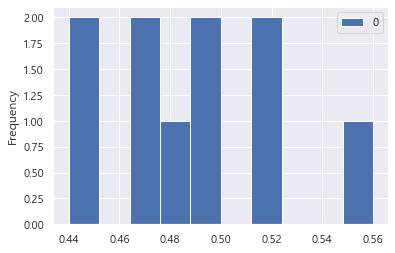

In [37]:
pd.DataFrame(bag_of_mean).plot.hist()

In [38]:
# ÎèôÏ†ÑÏùÑ ÎçòÏ°åÏùÑÎïå ÏïûÎ©¥Í≥º Îí∑Î©¥Ïù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞Ïùò ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞(n=100)Î•º 100Ìöå ÏàòÏßë

bag_of_mean = []

for i in range(100):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

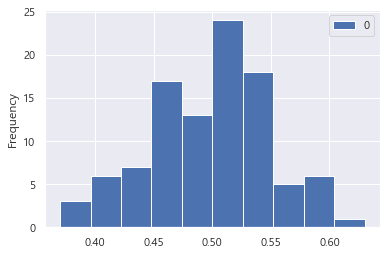

In [39]:
pd.DataFrame(bag_of_mean).plot.hist()

In [40]:
# ÎèôÏ†ÑÏùÑ ÎçòÏ°åÏùÑÎïå ÏïûÎ©¥Í≥º Îí∑Î©¥Ïù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞Ïùò ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞(n=100)Î•º 500Ìöå ÏàòÏßë
bag_of_mean = []
for i in range(500):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

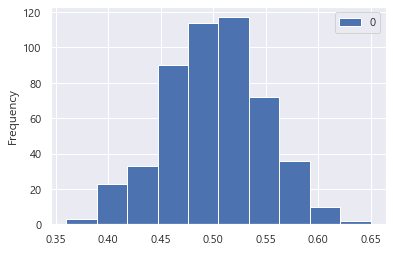

In [41]:
pd.DataFrame(bag_of_mean).plot.hist()

In [42]:
# ÎèôÏ†ÑÏùÑ ÎçòÏ°åÏùÑÎïå ÏïûÎ©¥Í≥º Îí∑Î©¥Ïù¥ ÎÇòÏò§Îäî Í≤ΩÏö∞Ïùò ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞(n=100)Î•º 1000Ìöå ÏàòÏßë

bag_of_mean = []

for i in range(1000):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)


<AxesSubplot:ylabel='Frequency'>

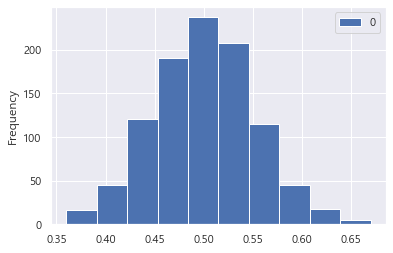

In [43]:
pd.DataFrame(bag_of_mean).plot.hist()

#### QQplot :Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï 
- ÏàòÏßë Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïùò Î∂ÑÏúÑÏàòÏôÄ ÎπÑÍµêÌïòÏó¨ Í∑∏Î¶¨Îäî Í∑∏ÎûòÌîÑ
- ÏßëÎã®Ïù¥ Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Î©¥ ÏßÅÏÑ†ÏúºÎ°ú ÌëúÌòÑ 

In [33]:
## ÏúÑ ÎèôÏ†ÑÏã§Ìóò ÏÇ¨Î°ÄÏóê ÏÉòÌîå 1000Í∞úÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† ÌåêÎã® 

fig, ax = plt.subplots(figsize=(4, 4))

# norm_sample = stats.norm.rvs(size=100)
stats.probplot(bag_of_mean, plot=ax)

plt.tight_layout()
plt.show()

### 3) t-Î∂ÑÌè¨
- Î™®Î∂ÑÏÇ∞(ÌëúÏ§ÄÌé∏Ï∞®)Ïù¥ ÏïåÎ†§Ï†∏ ÏûàÏßÄ ÏïäÍ≥†, ÌëúÎ≥∏Ïù¥ Ï∂©Î∂ÑÌïòÏßÄ Î™ªÌïú Í≤ΩÏö∞(ÏùºÎ∞òÏ†ÅÏúºÎ°ú ùëõ<30Ïù¥Î©¥)Îäî
- Ï†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ ÏòàÏ∏°Î≤îÏúÑÍ∞Ä ÎÑìÏùÄ tÎ∂ÑÌè¨Î•º ÏÇ¨Ïö©
 

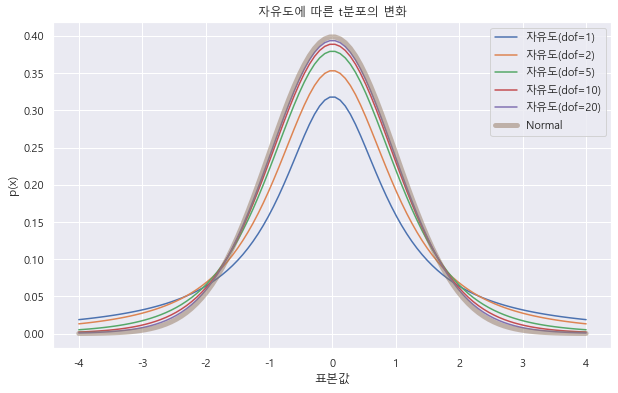

In [44]:
## ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ t Î∂ÑÌè¨ ÌôïÏù∏ 

t_data = np.linspace(-4, 4, 100)

# ÌîåÎ°Ø ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
plt.figure(figsize=(10, 6))          

for dof in [1, 2, 5, 10, 20]:
    t_dist = stats.t(df=dof)
    plt.plot(t_data, t_dist.pdf(t_data), label=("ÏûêÏú†ÎèÑ(dof=%d)" % dof))
    
plt.plot(t_data, stats.norm().pdf(t_data), label="Normal", lw=5, alpha=0.5)
plt.title("ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ tÎ∂ÑÌè¨Ïùò Î≥ÄÌôî")
plt.xlabel("ÌëúÎ≥∏Í∞í")
plt.ylabel("p(x)")
plt.legend()
plt.show()

## 2. ÌëúÎ≥∏Î∂ÑÏÇ∞Ïùò Î∂ÑÌè¨ 
- Î™®ÏßëÎã®Ïù¥ 1Í∞úÏù∏ Í≤ΩÏö∞ Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨Î°ú ÌÜµÍ≥ÑÎüâÏùÑ ÏÇ∞Ï∂ú
- Î™®ÏßëÎã®Ïù¥ 2Í∞úÏù∏ Í≤ΩÏö∞ FÎ∂ÑÌè¨Î°ú ÌÜµÍ≥ÑÎüâÏùÑ ÏÇ∞Ï∂ú, Îëê ÏßëÎã®Ïùò ÏÇ∞Ìè¨Î•º ÎπÑÍµêÌïòÎäîÎç∞ Ïù¥Ïö©

### 1) Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨
####  stats.chi2(dof) 

In [45]:
# Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨ ÌëúÌòÑ 
from scipy.stats import chi2

# ÎùºÏù∏Ïä§ÌéòÏù¥Ïä§ xÏ∂ï ÏÑ§Ï†ï 
Chi_X = np.linspace(0.5, 50, 100)

plt.figure(figsize=(10, 6))          # ÌîåÎ°Ø ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï

# ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨ 
for dof in [1,2,3,4,5,10,20,30,40,50] :  
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' + str(dof) + ')')
    

plt.xlabel(r'$\chi^2$')              # xÏ∂ï Î†àÏù¥Î∏î ÏßÄÏ†ï
plt.ylabel("y")                      # yÏ∂ï Î†àÏù¥Î∏î ÏßÄÏ†ï
plt.grid()                           # ÌîåÎ°ØÏóê Í≤©Ïûê Î≥¥Ïù¥Í∏∞
plt.title(r'$\chi^2$ Distribution with scipy.stats')     # ÌÉÄÏù¥ÌãÄ ÌëúÏãú
plt.legend()                         # Î≤îÎ°Ä ÌëúÏãú
plt.show()                           # ÌîåÎ°Ø 

## 2) FÎ∂ÑÌè¨ 
- Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Î∂ÑÏÇ∞ÏùÑ Îã§Î£®Îäî Î∂ÑÌè¨Ïù¥Î©∞, Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨ 2Í∞úÏùò ÎπÑÏú®ÌôïÎ•† Î∂ÑÌè¨
- Îëê ÏßëÎã®Ïùò ÏÇ∞Ìè¨Î•º ÎπÑÍµêÌïòÎäîÎç∞ Ïù¥Ïö©
#### stats.f() : FÎ∂ÑÌè¨ 

In [46]:
f_data = np.linspace(0.05, 3, 1000)

In [47]:
plt.figure(figsize=(10, 6))          # ÌîåÎ°Ø ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
plt.plot(f_data, stats.f(1, 2).pdf(f_data), ls="-", label="F(1,2)")
plt.plot(f_data, stats.f(3, 5).pdf(f_data), ls="--", label="F(3,5)")
plt.plot(f_data, stats.f(10, 10).pdf(f_data), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("ÏûêÏú†ÎèÑÏóê Îî∞Î•∏ FÎ∂ÑÌè¨Ïùò Î™®Ïñë")
plt.legend()
plt.show()